# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Noah Michel

Datum: 16.11.2023

Gruppe: 18

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie kann ich die Kapazität von etwas berechnen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/Kapazitaet.jpeg" width="800">

## Versuchsauswertung

In [1]:
import os
import numpy as np
import json 
from matplotlib import pyplot as plt
import h5py

# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
f = h5py.File("data/daten/daten_kapazitaet.h5", "r")


# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
rawdata = f.get('RawData') # als erstes den ersten ordner lesen 

keys_uuid = rawdata.keys() #gucken was drin ist

list_uuid = []
for i in keys_uuid: #namen der subgruppen (uuids) in eine Liste speichern
    list_uuid.append(i)

uuid_sensor1 = f.get('RawData/' + str(list_uuid[0])) #die unterordner aufrufen
uuid_sensor2 = f.get('RawData/' + str(list_uuid[1]))

keys_uuid_sensor1 = uuid_sensor1.keys()
keys_uuid_sensor2 = uuid_sensor2.keys()

list_sensor1 = []
for i in keys_uuid_sensor1: #temperatur und time in eine liste speichern
    list_sensor1.append(i)

list_sensor2 = []
for i in keys_uuid_sensor2:
    list_sensor2.append(i)

temperaturdaten_sensor1 = f.get('RawData/' + str(list_uuid[0]) + '/' + str(list_sensor1[0])) #temperaturdaten erfassen
temperaturdaten_sensor2 = f.get('RawData/' + str(list_uuid[1]) + '/' + str(list_sensor2[0]))

time_sensor1 = f.get('RawData/' + str(list_uuid[0]) + '/' + str(list_sensor1[1])) #time daten erfassen
time_sensor2 = f.get('RawData/' + str(list_uuid[1]) + '/' + str(list_sensor2[1]))

#alle temperatur- und timedaten in listen speichern

list_temperaturdaten_sensor1 = []
for i in temperaturdaten_sensor1:
    list_temperaturdaten_sensor1.append(i)

list_temperaturdaten_sensor2 = []
for i in temperaturdaten_sensor2:
    list_temperaturdaten_sensor2.append(i)

list_time_sensor1 = []
for i in time_sensor1:
    list_time_sensor1.append(i)

list_time_sensor2 = []
for i in time_sensor2:
    list_time_sensor2.append(i)

print (list_temperaturdaten_sensor1)
print (list_time_sensor1)

f.close()
# DONE #

[46.6875, 46.75, 46.875, 45.5625, 39.9375, 36.9375, 36.375, 36.0625, 35.6875, 35.375, 35.0625, 35.0625, 34.75, 34.6875, 34.625, 34.5, 34.375, 34.1875, 34.0625, 33.9375, 33.9375, 33.875, 33.8125, 33.75, 33.75]
[9541.091, 9543.715, 9546.339, 9548.963, 9551.587, 9554.211, 9556.835, 9559.459, 9562.083, 9564.707, 9567.331, 9569.955, 9572.579, 9575.203, 9577.827, 9580.45, 9583.074, 9585.707, 9588.323, 9590.947, 9593.571, 9596.195, 9598.819, 9601.476, 9604.099]


#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


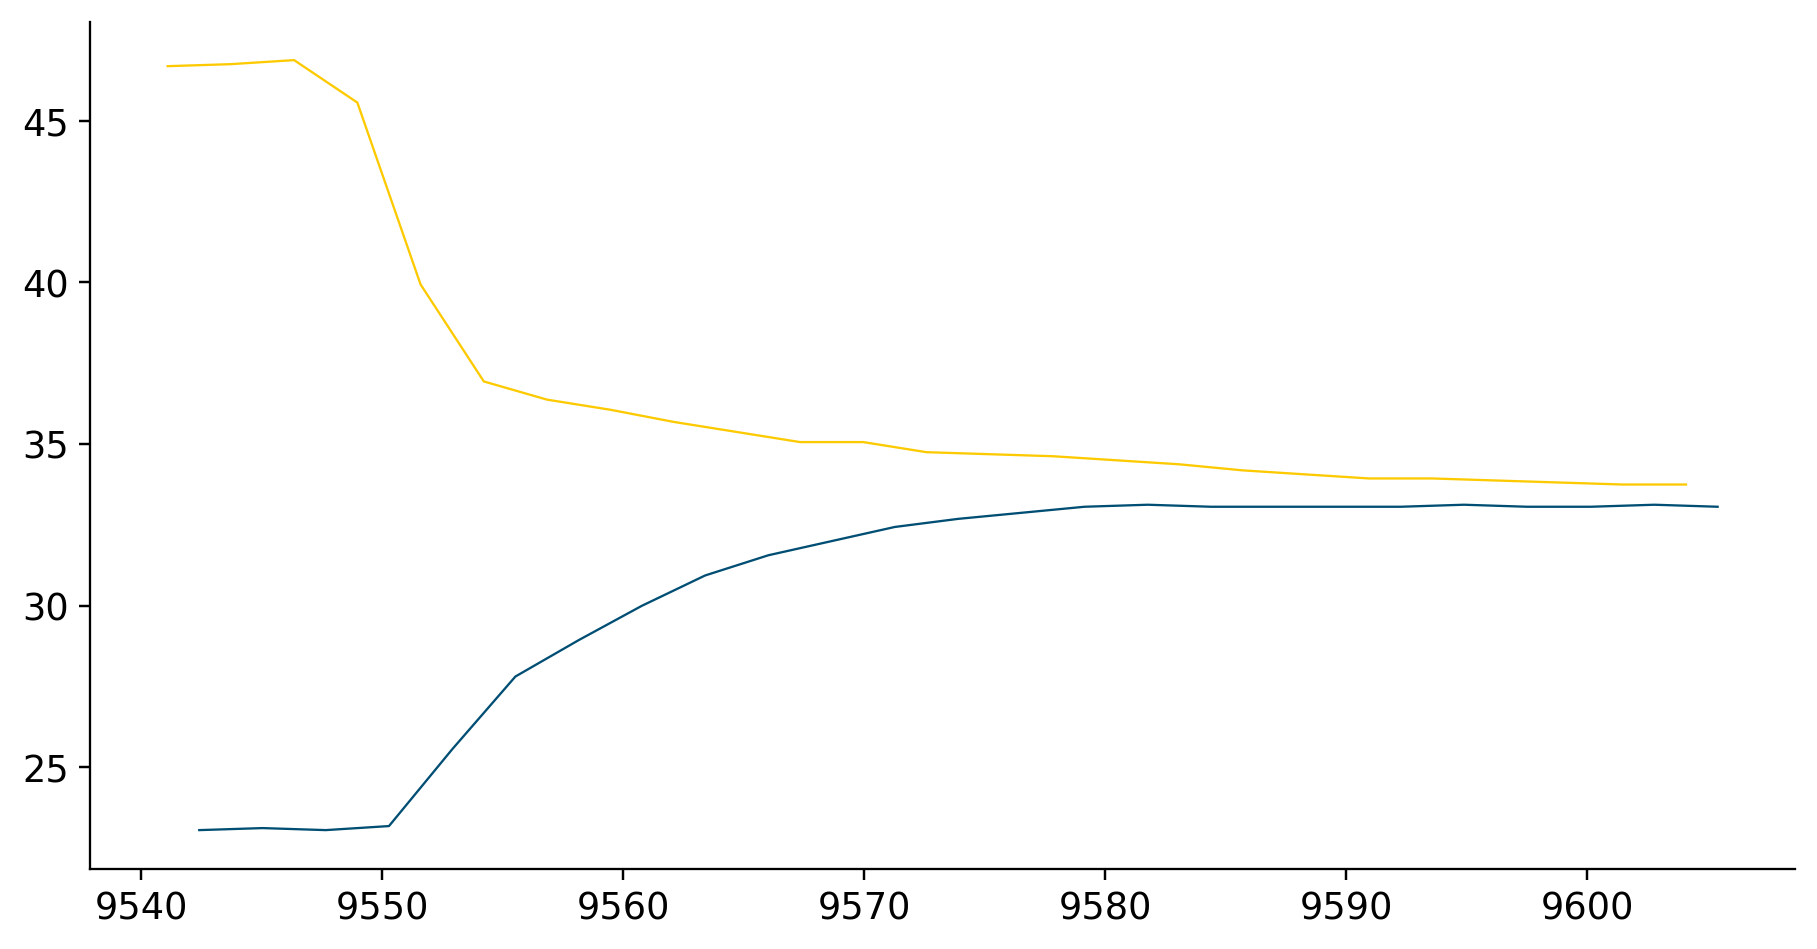

In [4]:
# TODO: Use the temperature and time data for plotting

x = np.array(list_temperaturdaten_sensor1)
y = np.array(list_time_sensor1)
x1 = np.array(list_temperaturdaten_sensor2)
y1 = np.array(list_time_sensor2)

plt.figure(figsize=(10,5))
plt.plot(y1,x1)
plt.plot(y,x)
plt.show()

#Wie man im Plot erkennen kann war sensor2 der der im kalten wasser war und sensor1 der der im warmen war

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.

#json file öffnen
with open("datasheets/probe_heat_capacity.json") as json_file:
    probe_heat_capacity1 = json.load(json_file)

#massen auslesen
masse_kaltes_wasser = probe_heat_capacity1["probe"]["metadata"]["masse_kalt_wasser"]
masse_warmes_wasser = probe_heat_capacity1["probe"]["metadata"]["masse_warm_wasser"]
    

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
Anfangstemperatur_T2 = list_temperaturdaten_sensor1[0] #Anfangstemperatur vom warmen wasser
Anfangstemperatur_T1 = list_temperaturdaten_sensor2[0] #Anfangstemperatur vom kalten wasser

letzte_temperaturmessung = len(list_temperaturdaten_sensor2)

#egal welcher sensor da die Mischungstemperatur neherungsweise gleich ist

Mischungstemperatur_TM = list_temperaturdaten_sensor2[letzte_temperaturmessung-1] # -1 da listen bei 0 anfangen
# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter

C = ((masse_warmes_wasser*water_heat_capa*(Anfangstemperatur_T2-Mischungstemperatur_TM))/(Mischungstemperatur_TM-Anfangstemperatur_T1) - (masse_kaltes_wasser*water_heat_capa))
# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result
print(C)
# DONE #

0.757625


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Kapazität wurde berechnet, diese hängt natürlich von der Masse ab. Wenn man die Masse verändern würde, würde sich auch die Kapazität verendern.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [9]:
#Nach vielen Versuchen ist mir das Experiment gelungen. Es hat mir vieles gelert, vorallen wie man mit den Sensoren umgeht.